In [20]:
from typing import List, Optional, Dict, Union

from rdkit import Chem
from rdkit.Chem import Draw, AllChem, rdMolAlign, inchi, rdFMCS

Install rdkit with the following pip command...

```bash
pip install rdkit 
```

### Aligning for **Talaroenamine B** from **`npmrd_curator_23d8da7e-03e7-4dc6-91ae-4dbc91213de2.json`**

#### Load Mol Block Into Rdkit

#### <u>**Structure**</u>
3D mol blocks are representations of molecules in 3D space. They represnt coordinate maps with xyz coordinates.

3d mol blocks generated by rdkit are forced to represent stereochemistry, which it does using force-field optimization, not with any chemical rules encoded in the SMILES.

- NOTE: There is **some level of randomness** in the force-field optimization process each time it's run

- If the molecule has multiple low-energy conformers (very common!), it can “settle” in different local minima depending on the random starting coordinates

- This means **one smiles string can generate two separate 3D mol blocks**. Usually viewed from different "angles" as well

That means all stereochemistry is defined within a 3d mol block, even it was generated from a smile string that did not define it.

#### <u>**Atom Numbering**</u>

Atom order in RDKit is determined by the order the molecules are presented in the input, whether a smiles string or a mol block.

Molecule successfully loaded!
Number of atoms: 53


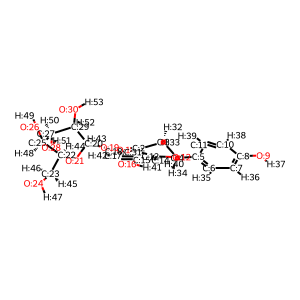

In [26]:
# 3D mol block respresentation of the compound

mol_block = """
     RDKit          3D

 53 56  0  0  0  0  0  0  0  0999 V2000
    0.1372    1.6257   -0.5189 O   0  0  0  0  0  0  0  0  0  1  0  0
    1.1248    0.8294   -0.3735 C   0  0  0  0  0  0  0  0  0  2  0  0
    2.5133    1.3600   -0.4444 C   0  0  0  0  0  0  0  0  0  3  0  0
    3.3940    0.4789    0.3778 C   0  0  2  0  0  0  0  0  0  4  0  0
    4.8291    0.7705    0.2263 C   0  0  0  0  0  0  0  0  0  5  0  0
    5.7658   -0.1591    0.6368 C   0  0  0  0  0  0  0  0  0  6  0  0
    7.1266    0.0722    0.5139 C   0  0  0  0  0  0  0  0  0  7  0  0
    7.5965    1.2517   -0.0286 C   0  0  0  0  0  0  0  0  0  8  0  0
    8.9758    1.4919   -0.1557 O   0  0  0  0  0  0  0  0  0  9  0  0
    6.6694    2.1849   -0.4408 C   0  0  0  0  0  0  0  0  0 10  0  0
    5.3169    1.9437   -0.3136 C   0  0  0  0  0  0  0  0  0 11  0  0
    3.1715   -0.8657   -0.0681 O   0  0  0  0  0  0  0  0  0 12  0  0
    1.9078   -1.4298    0.0115 C   0  0  0  0  0  0  0  0  0 13  0  0
    1.6777   -2.7780    0.2334 C   0  0  0  0  0  0  0  0  0 14  0  0
    0.3936   -3.2731    0.3012 C   0  0  0  0  0  0  0  0  0 15  0  0
    0.1299   -4.6122    0.5212 O   0  0  0  0  0  0  0  0  0 16  0  0
   -0.6847   -2.3959    0.1429 C   0  0  0  0  0  0  0  0  0 17  0  0
   -0.4793   -1.0524   -0.0784 C   0  0  0  0  0  0  0  0  0 18  0  0
   -1.5033   -0.1832   -0.2348 O   0  0  0  0  0  0  0  0  0 19  0  0
   -2.8726   -0.3854   -0.2176 C   0  0  2  0  0  0  0  0  0 20  0  0
   -3.4191    0.0523   -1.4188 O   0  0  0  0  0  0  0  0  0 21  0  0
   -4.7862   -0.0365   -1.4690 C   0  0  2  0  0  0  0  0  0 22  0  0
   -5.2300    0.4167   -2.8460 C   0  0  0  0  0  0  0  0  0 23  0  0
   -4.6388   -0.4257   -3.7823 O   0  0  0  0  0  0  0  0  0 24  0  0
   -5.3819    0.8991   -0.4103 C   0  0  1  0  0  0  0  0  0 25  0  0
   -6.7634    0.9677   -0.5256 O   0  0  0  0  0  0  0  0  0 26  0  0
   -4.9571    0.3130    0.9312 C   0  0  2  0  0  0  0  0  0 27  0  0
   -5.5018    0.9801    1.9988 O   0  0  0  0  0  0  0  0  0 28  0  0
   -3.4446    0.3768    0.9662 C   0  0  1  0  0  0  0  0  0 29  0  0
   -3.0415   -0.3396    2.1113 O   0  0  0  0  0  0  0  0  0 30  0  0
    0.8220   -0.5778   -0.1427 C   0  0  0  0  0  0  0  0  0 31  0  0
    2.8386    1.3625   -1.5185 H   0  0  0  0  0  0  0  0  0 32  0  0
    2.5301    2.4227   -0.0921 H   0  0  0  0  0  0  0  0  0 33  0  0
    3.0922    0.5810    1.4347 H   0  0  0  0  0  0  0  0  0 34  0  0
    5.4580   -1.1046    1.0707 H   0  0  0  0  0  0  0  0  0 35  0  0
    7.8706   -0.6441    0.8298 H   0  0  0  0  0  0  0  0  0 36  0  0
    9.4870    1.2232   -0.9941 H   0  0  0  0  0  0  0  0  0 37  0  0
    7.0131    3.1176   -0.8695 H   0  0  0  0  0  0  0  0  0 38  0  0
    4.6230    2.6901   -0.6441 H   0  0  0  0  0  0  0  0  0 39  0  0
    2.5187   -3.4352    0.3526 H   0  0  0  0  0  0  0  0  0 40  0  0
    0.0246   -4.9480    1.4881 H   0  0  0  0  0  0  0  0  0 41  0  0
   -1.6629   -2.8428    0.2063 H   0  0  0  0  0  0  0  0  0 42  0  0
   -3.0947   -1.4473   -0.0464 H   0  0  0  0  0  0  0  0  0 43  0  0
   -5.1884   -1.0348   -1.2469 H   0  0  0  0  0  0  0  0  0 44  0  0
   -6.3440    0.2958   -2.9714 H   0  0  0  0  0  0  0  0  0 45  0  0
   -4.9566    1.4729   -3.0121 H   0  0  0  0  0  0  0  0  0 46  0  0
   -4.4362   -1.3185   -3.4071 H   0  0  0  0  0  0  0  0  0 47  0  0
   -4.9378    1.9066   -0.4772 H   0  0  0  0  0  0  0  0  0 48  0  0
   -6.9540    1.5027   -1.3364 H   0  0  0  0  0  0  0  0  0 49  0  0
   -5.2488   -0.7678    0.8842 H   0  0  0  0  0  0  0  0  0 50  0  0
   -5.9943    1.8037    1.7539 H   0  0  0  0  0  0  0  0  0 51  0  0
   -3.1236    1.4257    0.9950 H   0  0  0  0  0  0  0  0  0 52  0  0
   -2.3625    0.2388    2.5678 H   0  0  0  0  0  0  0  0  0 53  0  0
  1  2  2  0
  2  3  1  0
  3  4  1  0
  4  5  1  0
  5  6  2  0
  6  7  1  0
  7  8  2  0
  8  9  1  0
  8 10  1  0
 10 11  2  0
  4 12  1  0
 12 13  1  0
 13 14  2  0
 14 15  1  0
 15 16  1  0
 15 17  2  0
 17 18  1  0
 18 19  1  0
 19 20  1  0
 20 21  1  0
 21 22  1  0
 22 23  1  0
 23 24  1  0
 22 25  1  0
 25 26  1  0
 25 27  1  0
 27 28  1  0
 27 29  1  0
 29 30  1  0
 18 31  2  0
 31  2  1  0
 11  5  1  0
 31 13  1  0
 29 20  1  0
  3 32  1  0
  3 33  1  0
  4 34  1  1
  6 35  1  0
  7 36  1  0
  9 37  1  0
 10 38  1  0
 11 39  1  0
 14 40  1  0
 16 41  1  0
 17 42  1  0
 20 43  1  1
 22 44  1  1
 23 45  1  0
 23 46  1  0
 24 47  1  0
 25 48  1  6
 26 49  1  0
 27 50  1  6
 28 51  1  0
 29 52  1  1
 30 53  1  0
M  END
"""

# Convert MOL block to/ RDKit Mol object
mol1 = Chem.MolFromMolBlock(mol_block, removeHs=False)
AllChem.EmbedMolecule(mol1, AllChem.ETKDG())

if mol1 is None:
    print("Error reading mol block")
else:
    print("Molecule successfully loaded!")
    print("Number of atoms:", mol1.GetNumAtoms())

Chem.Draw.MolToImage(mol1)

In [6]:
Chem.MolToSmiles(mol1)

'[O:1]=[C:2]1[C@@:3]([H:32])([H:33])[C@@:4]([c:5]2[c:6]([H:35])[c:7]([H:36])[c:8]([O:9][H:37])[c:10]([H:38])[c:11]2[H:39])([H:34])[O:12][c:13]2[c:14]([H:40])[c:15]([O:16][H:41])[c:17]([H:42])[c:18]([O:19][C@:20]3([H:43])[O:21][C@@:22]([C@@:23]([O:24][H:47])([H:45])[H:46])([H:44])[C@:25]([O:26][H:49])([H:48])[C@@:27]([O:28][H:51])([H:50])[C@:29]3([O:30][H:53])[H:52])[c:31]21'

#### Load Smiles Into Rdkit

Note: This smiles string represents the same molecule as the mol block below.

Our goal with this example will be to align both rdkit mole instances (`mol1` from the 3d mol block and `mol2` from the smiles string) and then convert the numbering in the assignment list (currently utilizing the mol block numbering / `mol1`) so that instead aligns with the numbering in the mol block from the smiles string (`mol2`)

In [ ]:
# Smiles representation of the compound
smiles = "O(C1=C2C(O[C@H](CC2=O)C3=CC=C(O)C=C3)=CC(O)=C1)[C@@H]4O[C@H](CO)[C@@H](O)[C@H](O)[C@H]4O"

In [7]:
mol2 = Chem.MolFromSmiles(smiles)
mol2 = Chem.AddHs(mol2)
AllChem.EmbedMolecule(mol2, AllChem.ETKDG())
AllChem.UFFOptimizeMolecule(mol2)

if mol2 is None:
    print("Error reading mol block")
else:
    print("Molecule successfully loaded!")
    print("Number of atoms:", mol2.GetNumAtoms())

Molecule successfully loaded!
Number of atoms: 53


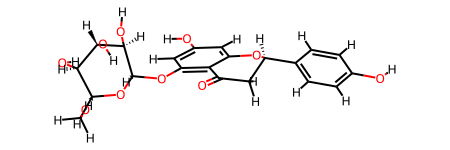

In [69]:
mol2

# Alignment

## Confirm structures are identical

Before performing alignment we should confirm that both mol instances represent the same molecular structure.

Inchikey is a great way to check this since the same molecule can be represented by multiple smiles strings but inchikey will always be the same.

In [70]:
inchikey1 = inchi.MolToInchiKey(mol1)
inchikey2 = inchi.MolToInchiKey(mol2)

print("InChIKey 1:", inchikey1)
print("InChIKey 2:", inchikey2)
print("Structures identical?", inchikey1 == inchikey2)

InChIKey 1: MFQIWHVVFBCURA-KYSZGLPYSA-N
InChIKey 2: MFQIWHVVFBCURA-KYSZGLPYSA-N
Structures identical? True


#### Canonical SMILES in RDKit:

Deterministic atom ordering depends on the internal representation of the molecule.

RDKit will produce different canonical SMILES if:

- Stereochemistry is implicit vs explicit

- Hydrogens are explicitly represented

- Mol have slightly different 3D structure (possible and even quite likely due to how structures are generated in rkit, *see info on this above*)

Because of this the canonical smiles may not match and SHOULD NOT BE USED FOR ALIGNMENT IN THIS CASE.

<b>Conclusion: Use inchikey to confirm a structural match</b>

In [71]:
canonicalsmiles1 = Chem.MolToSmiles(mol1, canonical=True)
canonicalsmiles2 = Chem.MolToSmiles(mol2, canonical=True)

print("Canonical SMILES 1:", canonicalsmiles1)
print("Canonical SMILES 2:", canonicalsmiles2)
print("Structures identical?", canonicalsmiles1 == canonicalsmiles2)

Canonical SMILES 1: [O:1]=[C:2]1[C@@:3]([H:32])([H:33])[C@@:4]([c:5]2[c:6]([H:35])[c:7]([H:36])[c:8]([O:9][H:37])[c:10]([H:38])[c:11]2[H:39])([H:34])[O:12][c:13]2[c:14]([H:40])[c:15]([O:16][H:41])[c:17]([H:42])[c:18]([O:19][C@:20]3([H:43])[O:21][C@@:22]([C@@:23]([O:24][H:47])([H:45])[H:46])([H:44])[C@:25]([O:26][H:49])([H:48])[C@@:27]([O:28][H:51])([H:50])[C@:29]3([O:30][H:53])[H:52])[c:31]21
Canonical SMILES 2: [H]Oc1c([H])c([H])c([C@]2([H])Oc3c([H])c(O[H])c([H])c(O[C@]4([H])O[C@]([H])(C([H])([H])O[H])[C@@]([H])(O[H])[C@]([H])(O[H])[C@@]4([H])O[H])c3C(=O)C2([H])[H])c([H])c1[H]
Structures identical? False


# Alignment

## <b> <u>IMPORTANT</u>: Indexing with rdkit </b>

Note that <b>a 3d mol block exported as a string <u>starts its indexing of atoms at 1</u></b>

- <b>Assignment shift value lists</b> exported from the NP-MRD curator follow this numbering and <b>ALSO <u>start at 1</u></b>

However, internally <b>rdkit mol objects are stored in memory with the indexing <u>starting at 0</u></b>

This <b><u>MUST</u> be accounted for</b> in **ALL** of our scripts!

## Align Mol Blocks

In [11]:
from rdkit import Chem
from rdkit.Chem import rdDepictor, inchi

def get_mol1_to_mol2_index_map(mol1: Chem.Mol, mol2: Chem.Mol):
    """
    Align mol2 onto mol1 and generate an atom index mapping (mol1 -> mol2)
    based on **2D structural topology** (not accounting for 3D coordinates).

    Since both molecules are assumed to originate from SMILES (without
    meaningful 3D coordinates), this function uses RDKit’s 2D depiction
    layout to achieve a deterministic and topology-based alignment.

    ABOUT ATOM INDEXING
    ----------------------
    RDKit internally indexes atoms starting at **0** (Python-style indexing).
    However, exported MOL blocks, as well as most per-atom property lists
    (e.g., NMR chemical shift tables, partial charge lists), use **1-based indexing**.
    To keep this consistent with external data and file formats, this function
    returns a **1-based atom index mapping** — meaning atom index `0` in RDKit
    becomes `1` in the returned dictionary.

    Example:
        RDKit atom index 0 → MOL index 1
        RDKit atom index 1 → MOL index 2
        ...

    The mapping therefore directly aligns with how atoms are numbered in
    exported 3D MOL blocks and related property lists.


    ---
    HOW IT WORKS
    -------------
    1. **Adds hydrogens consistently** to both molecules to ensure atom
       counts and bond structures match.
    2. **Checks InChIKey equality** for a basic sanity check that both
       molecules represent the same structure.
    3. **Generates 2D coordinates** (instead of 3D embedding) using
       RDKit’s `Compute2DCoords` — this gives reproducible, flattened
       coordinates that reflect molecular topology.
    4. **Finds a substructure match** to map atoms in mol1 → mol2 using
       graph connectivity (bond topology).
    5. **Aligns mol2 to mol1 in 2D coordinate space** using the derived
       atom mapping.
    6. **Returns a mapping dictionary** whose indices start at **1** to
       match the numbering convention used in human-readable molecular
       formats (like MOL/SDF blocks), even though RDKit uses 0-based
       indices internally.

    ---
    WHY 2D ALIGNMENT?
    -----------------
    - More deterministic and reproducible than 3D embedding.
    - Not dependent on stochastic force-field geometry optimization.
    - Ideal when molecules share the same structure but lack explicit
      3D conformation (e.g., both loaded from SMILES).

    ---
    Args:
        mol1 (Chem.Mol): Reference molecule.
        mol2 (Chem.Mol): Molecule to align onto mol1.

    Returns:
        tuple:
            mol1_to_mol2 (dict):
                Mapping of **mol1 atom indices → mol2 atom indices**,
                but with numbering starting from **1** (human-readable).
                Example: `{1: 1, 2: 2, 3: 3, ...}`
    """
    # Copy molecules to avoid modifying inputs
    mol1_copy = Chem.Mol(mol1)
    mol2_copy = Chem.Mol(mol2)

    # Add explicit hydrogens for consistent atom ordering
    mol1_copy = Chem.AddHs(mol1_copy)
    mol2_copy = Chem.AddHs(mol2_copy)

    # Compare InChIKeys for strict molecular identity
    inchikey1 = inchi.MolToInchiKey(mol1_copy)
    inchikey2 = inchi.MolToInchiKey(mol2_copy)

    if inchikey1 != inchikey2:
        raise ValueError(
            f"Molecules do not represent the same structure:\n"
            f"  mol1 InChIKey: {inchikey1}\n"
            f"  mol2 InChIKey: {inchikey2}"
        )

    # Generate 2D coordinates (deterministic layout)
    rdDepictor.Compute2DCoords(mol1_copy)
    rdDepictor.Compute2DCoords(mol2_copy)

    # Perform substructure match (mol2 → mol1)
    substruct_match = mol2_copy.GetSubstructMatch(mol1_copy)

    # If no match or partial match, raise an error
    if not substruct_match or len(substruct_match) != mol1_copy.GetNumAtoms():
        raise ValueError(
            "Failed to establish full one-to-one atom correspondence between molecules."
        )

    # Build the 1-based atom index mapping (mol1 → mol2)
    mol1_to_mol2 = {mol1_idx + 1: mol2_idx + 1 for mol1_idx, mol2_idx in enumerate(substruct_match)}

    return mol1_to_mol2

In [12]:
mol1_to_mol2 = get_mol1_to_mol2_index_map(mol1=mol1, mol2=mol2)
print("Atom index mapping (mol1 → mol2):")
print(mol1_to_mol2)

Atom index mapping (mol1 → mol2):
{1: 9, 2: 8, 3: 7, 4: 6, 5: 10, 6: 11, 7: 12, 8: 13, 9: 14, 10: 15, 11: 16, 12: 5, 13: 4, 14: 17, 15: 18, 16: 19, 17: 20, 18: 2, 19: 1, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 3, 32: 33, 33: 34, 34: 32, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53}


## Remap Carbon Shifts

Below is an example of Carbon shifts that would exist in NP-MRD Curator data.

*Remember that their <u><b>indexing starts at 1</b></u>*

The `rdkit_index` is the indexing that <b>aligns with 3d_mol block</b>

The `atom_index` is the indexing that <b>aligns with the publication</b> the compound was curated from

In [ ]:
mol1_c_shifts = [
        {
          "rdkit_index": 4,
          "shift": 78.1,
          "atom_index": "2"
        },
        {
          "rdkit_index": 3,
          "shift": 44.5,
          "atom_index": "3"
        },
        {
          "rdkit_index": 2,
          "shift": 189.3,
          "atom_index": "4"
        },
        {
          "rdkit_index": 18,
          "shift": 159.9,
          "atom_index": "5"
        },
        {
          "rdkit_index": 17,
          "shift": 98.8,
          "atom_index": "6"
        },
        {
          "rdkit_index": 15,
          "shift": 164.6,
          "atom_index": "7"
        },
        {
          "rdkit_index": 14,
          "shift": 97.7,
          "atom_index": "8"
        },
        {
          "rdkit_index": 13,
          "shift": 163.6,
          "atom_index": "9"
        },
        {
          "rdkit_index": 31,
          "shift": 105.1,
          "atom_index": "10"
        },
        {
          "rdkit_index": 5,
          "shift": 129,
          "atom_index": "1'"
        },
        {
          "rdkit_index": 6,
          "shift": 128.3,
          "atom_index": "2'"
        },
        {
          "rdkit_index": 7,
          "shift": 115,
          "atom_index": "3'"
        },
        {
          "rdkit_index": 8,
          "shift": 157.4,
          "atom_index": "4'"
        },
        {
          "rdkit_index": 10,
          "shift": 115,
          "atom_index": "5'"
        },
        {
          "rdkit_index": 11,
          "shift": 128.3,
          "atom_index": "6'"
        },
        {
          "rdkit_index": 20,
          "shift": 102.2,
          "atom_index": "1''"
        },
        {
          "rdkit_index": 29,
          "shift": 73.3,
          "atom_index": "2''"
        },
        {
          "rdkit_index": 27,
          "shift": 75.9,
          "atom_index": "3''"
        },
        {
          "rdkit_index": 25,
          "shift": 69.4,
          "atom_index": "4''"
        },
        {
          "rdkit_index": 22,
          "shift": 77.3,
          "atom_index": "5''"
        },
        {
          "rdkit_index": 23,
          "shift": 60.5,
          "atom_index": "6''"
        }
]

Below is an example of Proton (hydrogen) shifts that would exist in NP-MRD Curator data.

*Remember that their <u><b>indexing starts at 1</b></u>*

- The `rdkit_index`
    The indexing that <b>aligns with 3d_mol block</b>
    For hydrogen can be a **list** instead of a single value because a single NMR peak may correspond to **more than one chemically equivalent hydrogen atom** in the molecule.  

- The `atom_index`
    The indexing that <b>aligns with the publication</b> the compound was curated from.
    
- `multiplicity`
    Describes the splitting pattern of the signal, caused by spin-spin coupling with neighboring nuclei.
    Common values include:
      - s  → singlet (no coupling)
      - d  → doublet (coupled to 1 equivalent nucleus)
      - t  → triplet (coupled to 2 equivalent nuclei)
      - q  → quartet (coupled to 3 equivalent nuclei)
      - m  → multiplet (complex or unresolved splitting)
      - dd → doublet of doublets (coupled to two non-equivalent nuclei)
    Here, "dd" means this proton is coupled to two non-equivalent neighbors.

- `coupling`
    The list of coupling constants (J values) in Hertz (Hz), corresponding to the observed splitting.
    Each value quantifies the magnetic coupling strength between this nucleus and a neighboring spin.
    For example, [13.1, 2.1] Hz indicates two separate coupling interactions — one strong, one weak.
    
- `interchangable_index`
    A list of indices of other protons that are magnetically or chemically equivalent (i.e., indistinguishable by NMR).
    If non-empty, this indicates that these protons can be exchanged without changing the spectrum (e.g., two hydrogens on the same methyl group).
    An empty list means the proton has a unique environment.

In [34]:
mol1_h_shifts = [
        {
          "shift": 5.38,
          "multiplicity": "dd",
          "coupling": [
            13.1,
            2.1
          ],
          "atom_index": "2",
          "rdkit_index": [
            34
          ],
          "interchangable_index": []
        },
        {
          "shift": 3.08,
          "multiplicity": None,
          "coupling": [],
          "atom_index": "3\u03b1",
          "rdkit_index": [
            33
          ],
          "interchangable_index": []
        },
        {
          "shift": 2.63,
          "multiplicity": "dd",
          "coupling": [
            17.1,
            2.1
          ],
          "atom_index": "3\u03b2",
          "rdkit_index": [
            32
          ],
          "interchangable_index": []
        },
        {
          "shift": 6.34,
          "multiplicity": "br s",
          "coupling": [],
          "atom_index": "8",
          "rdkit_index": [
            40
          ],
          "interchangable_index": []
        },
        {
          "shift": 6.06,
          "multiplicity": "br s",
          "coupling": [],
          "atom_index": "6",
          "rdkit_index": [
            42
          ],
          "interchangable_index": []
        },
        {
          "shift": 7.3,
          "multiplicity": "d",
          "coupling": [
            8.4
          ],
          "atom_index": "2'",
          "rdkit_index": [
            35
          ],
          "interchangable_index": []
        },
        {
          "shift": 7.3,
          "multiplicity": "d",
          "coupling": [
            8.4
          ],
          "atom_index": "6'",
          "rdkit_index": [
            39
          ],
          "interchangable_index": []
        },
        {
          "shift": 6.78,
          "multiplicity": "d",
          "coupling": [
            8.4
          ],
          "atom_index": "3'",
          "rdkit_index": [
            36
          ],
          "interchangable_index": []
        },
        {
          "shift": 6.78,
          "multiplicity": "d",
          "coupling": [
            8.4
          ],
          "atom_index": "5'",
          "rdkit_index": [
            38
          ],
          "interchangable_index": []
        },
        {
          "shift": 5.39,
          "multiplicity": "d",
          "coupling": [
            7
          ],
          "atom_index": "1\"",
          "rdkit_index": [
            43
          ],
          "interchangable_index": []
        }
]

In [40]:
from typing import List, Dict, Optional


def align_npmrd_curator_shifts(
    c_shifts: Optional[List[Dict]] = None,
    h_shifts: Optional[List[Dict]] = None,
    mol1_to_mol2: Dict[int, int] = {}
) -> List[Dict]:
    """
    Remap the RDKit atom indices in NMR shift lists according to a **1-based**
    atom index mapping derived from `get_mol1_to_mol2_index_map`.

    This function aligns 13C and 1H NMR shift data between two equivalent
    molecular structures (e.g., curator and canonical versions) by updating
    the 'rdkit_index' values using a provided atom mapping.

    ---
    INDEXING CLARIFICATION
    ----------------------
    RDKit internally indexes atoms starting from **0**, but exported MOL blocks,
    and shift value tables (like those in NPMRD), use **1-based indexing**.

    The mapping `mol1_to_mol2` provided to this function is **1-based** —
    meaning atom index 1 in molecule 1 maps to atom index 1 in molecule 2.

    Example mapping:
        mol1_to_mol2 = {1: 1, 2: 2, 3: 3, 4: 5, 5: 4}

    Example behavior:
        - If a 13C shift entry has "rdkit_index": 4, it will be remapped to 5.
        - If a 1H shift entry has "rdkit_index": [12, 13], it will map both
          indices through the dictionary accordingly.

    ---
    SUPPORTED SHIFT TYPES
    ----------------------
    • **13C shifts (c_shifts)**:
        - Each entry contains:
            - `"shift"`: float
            - `"rdkit_index"`: int (1-based)
        - Mapping is applied directly to the integer index.

    • **1H shifts (h_shifts)**:
        - Each entry contains:
            - `"shift"`: float
            - `"multiplicity"`: str (optional)
            - `"coupling"`: list (optional)
            - `"rdkit_index"`: int or list[int] (1-based)
        - Each hydrogen index is mapped individually.
        - If multiple mapped hydrogens exist, they are kept as a list.
        - If only one, it is stored as a single integer.

    ---
    Args:
        c_shifts (list[dict], optional):
            List of 13C shift dictionaries, each containing at least
            `'rdkit_index'` and `'shift'`.

        h_shifts (list[dict], optional):
            List of 1H shift dictionaries, where `'rdkit_index'` may
            be an integer or list of integers.

        mol1_to_mol2 (dict[int, int]):
            Mapping of **1-based atom indices** from molecule 1 → molecule 2.
            Example: `{1: 1, 2: 2, 3: 3}`

    Returns:
        list[dict]:
            Combined list of remapped C and H shift entries,
            with `'rdkit_index'` updated according to the mapping.
    """
    remapped_shifts = []

    # --- Process 13C shifts ---
    if c_shifts:
        for entry in c_shifts:
            old_idx_1based = entry["rdkit_index"]
            new_idx_1based = mol1_to_mol2.get(old_idx_1based)
            if new_idx_1based is not None:
                new_entry = entry.copy()
                new_entry["rdkit_index"] = new_idx_1based
                remapped_shifts.append(new_entry)

    # --- Process 1H shifts ---
    if h_shifts:
        for entry in h_shifts:
            old_indices_1based = entry["rdkit_index"]
            if not isinstance(old_indices_1based, list):
                old_indices_1based = [old_indices_1based]

            # Map each index using mol1_to_mol2
            new_indices_1based = [
                mol1_to_mol2[idx] for idx in old_indices_1based if idx in mol1_to_mol2
            ]

            if new_indices_1based:
                new_entry = entry.copy()
                new_entry["rdkit_index"] = (
                    new_indices_1based[0]
                    if len(new_indices_1based) == 1
                    else new_indices_1based
                )
                remapped_shifts.append(new_entry)

    return remapped_shifts

In [41]:
mol2_c_shifts = align_shifts(
    c_shifts = mol1_c_shifts,
    mol1_to_mol2 = mol1_to_mol2
)

print(mol2_c_shifts)

[{'rdkit_index': 8, 'shift': 78.1, 'atom_index': '2'}, {'rdkit_index': 9, 'shift': 44.5, 'atom_index': '3'}, {'rdkit_index': 10, 'shift': 189.3, 'atom_index': '4'}, {'rdkit_index': 21, 'shift': 159.9, 'atom_index': '5'}, {'rdkit_index': 20, 'shift': 98.8, 'atom_index': '6'}, {'rdkit_index': 18, 'shift': 164.6, 'atom_index': '7'}, {'rdkit_index': 5, 'shift': 97.7, 'atom_index': '8'}, {'rdkit_index': 6, 'shift': 163.6, 'atom_index': '9'}, {'rdkit_index': 32, 'shift': 105.1, 'atom_index': '10'}, {'rdkit_index': 7, 'shift': 129, 'atom_index': "1'"}, {'rdkit_index': 11, 'shift': 128.3, 'atom_index': "2'"}, {'rdkit_index': 12, 'shift': 115, 'atom_index': "3'"}, {'rdkit_index': 13, 'shift': 157.4, 'atom_index': "4'"}, {'rdkit_index': 15, 'shift': 115, 'atom_index': "5'"}, {'rdkit_index': 16, 'shift': 128.3, 'atom_index': "6'"}, {'rdkit_index': 2, 'shift': 102.2, 'atom_index': "1''"}, {'rdkit_index': 30, 'shift': 73.3, 'atom_index': "2''"}, {'rdkit_index': 28, 'shift': 75.9, 'atom_index': "3''

In [42]:
mol2_h_shifts = align_shifts(
    h_shifts = mol1_h_shifts,
    mol1_to_mol2 = mol1_to_mol2
)

print(mol2_h_shifts)

[{'shift': 5.38, 'multiplicity': 'dd', 'coupling': [13.1, 2.1], 'atom_index': '2', 'rdkit_index': 35, 'interchangable_index': []}, {'shift': 3.08, 'multiplicity': None, 'coupling': [], 'atom_index': '3α', 'rdkit_index': 34, 'interchangable_index': []}, {'shift': 2.63, 'multiplicity': 'dd', 'coupling': [17.1, 2.1], 'atom_index': '3β', 'rdkit_index': 4, 'interchangable_index': []}, {'shift': 6.34, 'multiplicity': 'br s', 'coupling': [], 'atom_index': '8', 'rdkit_index': 40, 'interchangable_index': []}, {'shift': 6.06, 'multiplicity': 'br s', 'coupling': [], 'atom_index': '6', 'rdkit_index': 42, 'interchangable_index': []}, {'shift': 7.3, 'multiplicity': 'd', 'coupling': [8.4], 'atom_index': "2'", 'rdkit_index': 33, 'interchangable_index': []}, {'shift': 7.3, 'multiplicity': 'd', 'coupling': [8.4], 'atom_index': "6'", 'rdkit_index': 39, 'interchangable_index': []}, {'shift': 6.78, 'multiplicity': 'd', 'coupling': [8.4], 'atom_index': "3'", 'rdkit_index': 36, 'interchangable_index': []}, {

## Remap H Shifts

## (Visually) Verify Alignment

In [50]:
from collections import OrderedDict
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
import svgutils.transform as sg

def draw_mol_with_shifts(
    mol, 
    c_shifts=None, 
    h_shifts=None, 
    size=(1000, 1000), 
    kekulize=True, 
    compound_name="", 
    compound_smiles=""
):
    """
    Draw an RDKit molecule with optional C and H NMR shifts overlaid.
    
    Handles shift lists where 'rdkit_index' is 1-based (common in MOL/NMR data) 
    and converts them to 0-based RDKit indices.

    Args:
        mol (rdkit.Chem.Mol): Molecule to draw.
        c_shifts (list of dict): List of 13C shifts with "rdkit_index" (1-based) and "shift".
        h_shifts (list of dict): List of 1H shifts with "rdkit_index" (1-based, int or list), 
                                 "shift", "multiplicity".
        size (tuple): Image size (width, height).
        kekulize (bool): Whether to kekulize the molecule.
        compound_name (str): Name of the compound to display at bottom.
        compound_smiles (str): SMILES string to display at bottom.
    
    Returns:
        IPython.display.SVG: SVG image with shifts overlaid.
    """
    mol_copy = Chem.Mol(mol)
    
    # Flatten to 2D coordinates
    AllChem.Compute2DCoords(mol_copy)
    
    # Show atom map numbers (1-based for visualization)
    for atom in mol_copy.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx() + 1)
    
    # Build a dictionary mapping 0-based atom indices → shift values
    shift_dict = {}
    
    # Process 13C shifts
    if c_shifts:
        for s in c_shifts:
            rdkit_idx_0based = s["rdkit_index"] - 1  # convert 1-based to 0-based
            shift_dict[rdkit_idx_0based] = str(s["shift"])
    
    # Process 1H shifts
    if h_shifts:
        for s in h_shifts:
            rdkit_indices = s["rdkit_index"]
            if not isinstance(rdkit_indices, list):
                rdkit_indices = [rdkit_indices]
            # Convert all indices to 0-based
            rdkit_indices = [i - 1 for i in rdkit_indices]
            for idx in rdkit_indices:
                shift_dict[idx] = f"{s['shift']}{s.get('multiplicity','')}"
    
    # Sort shift dictionary by atom index
    shift_dict = OrderedDict(sorted(shift_dict.items()))
    
    # Assign shift property to atoms
    for atom in mol_copy.GetAtoms():
        idx = atom.GetIdx()
        atom.SetProp('shift', shift_dict.get(idx, ''))
    
    # Initialize RDKit drawer
    drawer = rdMolDraw2D.MolDraw2DSVG(size[0], size[1])
    options = drawer.drawOptions()
    options.minFontSize = 10
    options.maxFontSize = 13
    options.multipleBondOffset = 0.07
    options.scaleBondWidth = True
    options.updateAtomPalette({
        1: (0.5, 0, 0.5, 0.5),  # H
        6: (0, 0.5, 0.5, 0.9),  # C
        8: (0, 0.9, 0.9, 0.9),  # O
    })
    
    if kekulize:
        Chem.Kekulize(mol_copy)
    
    drawer.DrawMolecule(mol_copy)
    drawer.FinishDrawing()
    
    # Convert SVG to svgutils figure
    svg_text = drawer.GetDrawingText().replace('svg:', '')
    fig = sg.fromstring(svg_text)
    
    # Overlay shift values
    for atom in mol_copy.GetAtoms():
        shift_value = atom.GetProp('shift')
        if shift_value:
            atom_idx = atom.GetIdx()  # 0-based, matches shift_dict keys
            atom_pos = drawer.GetDrawCoords(atom_idx)
            x, y = atom_pos.x + 15, atom_pos.y + 15  # small offset for text
            
            text_color = "purple" if atom.GetSymbol() == "H" else "#006400"
            overlay_font_size = 10
            
            # White outline
            outline = sg.TextElement(
                x, y, shift_value, size=overlay_font_size,
                font='sans-serif', weight='bolder', anchor='middle', color='white'
            )
            fig.append(outline)
            
            # Main text
            text_label = sg.TextElement(
                x, y, shift_value, size=overlay_font_size,
                font='sans-serif', weight='normal', anchor='middle', color=text_color
            )
            fig.append(text_label)
    
    # Add compound name and SMILES
    if compound_name:
        name_text = sg.TextElement(
            x=size[0]/2, y=size[1]-125, text=compound_name,
            size=13, font='sans-serif', weight='normal', anchor='middle', color='black'
        )
        fig.append(name_text)
    
    if compound_smiles:
        smiles_text = sg.TextElement(
            x=size[0]/2, y=size[1]-105, text=compound_smiles,
            size=13, font='sans-serif', weight='normal', anchor='middle', color='black'
        )
        fig.append(smiles_text)
    
    return SVG(fig.to_str())

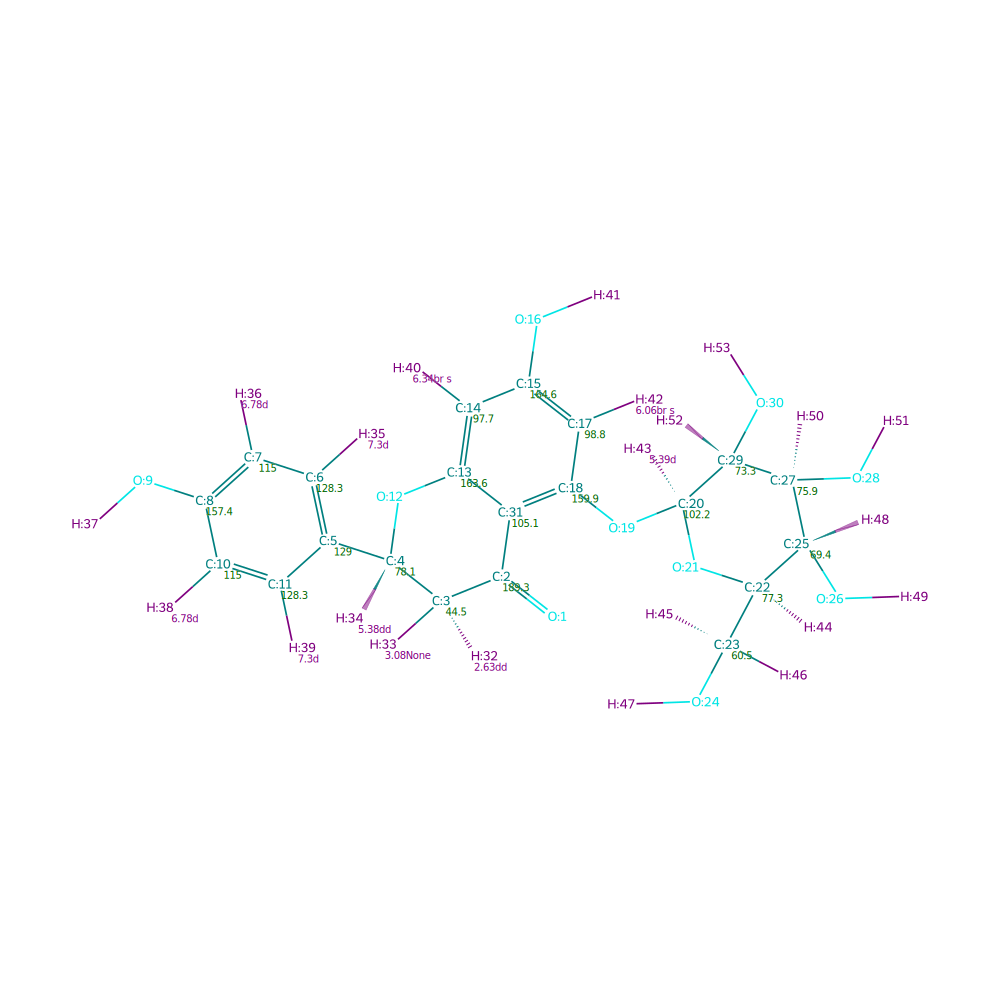

In [51]:
# Draw structure with mol1 shifts
draw_mol_with_shifts(
    mol=mol1,
    c_shifts=mol1_c_shifts,
    h_shifts=mol1_h_shifts
)

# IMPORTANT: You should visually verify that the same atoms have the same shift values to confirm the alignment was successful!

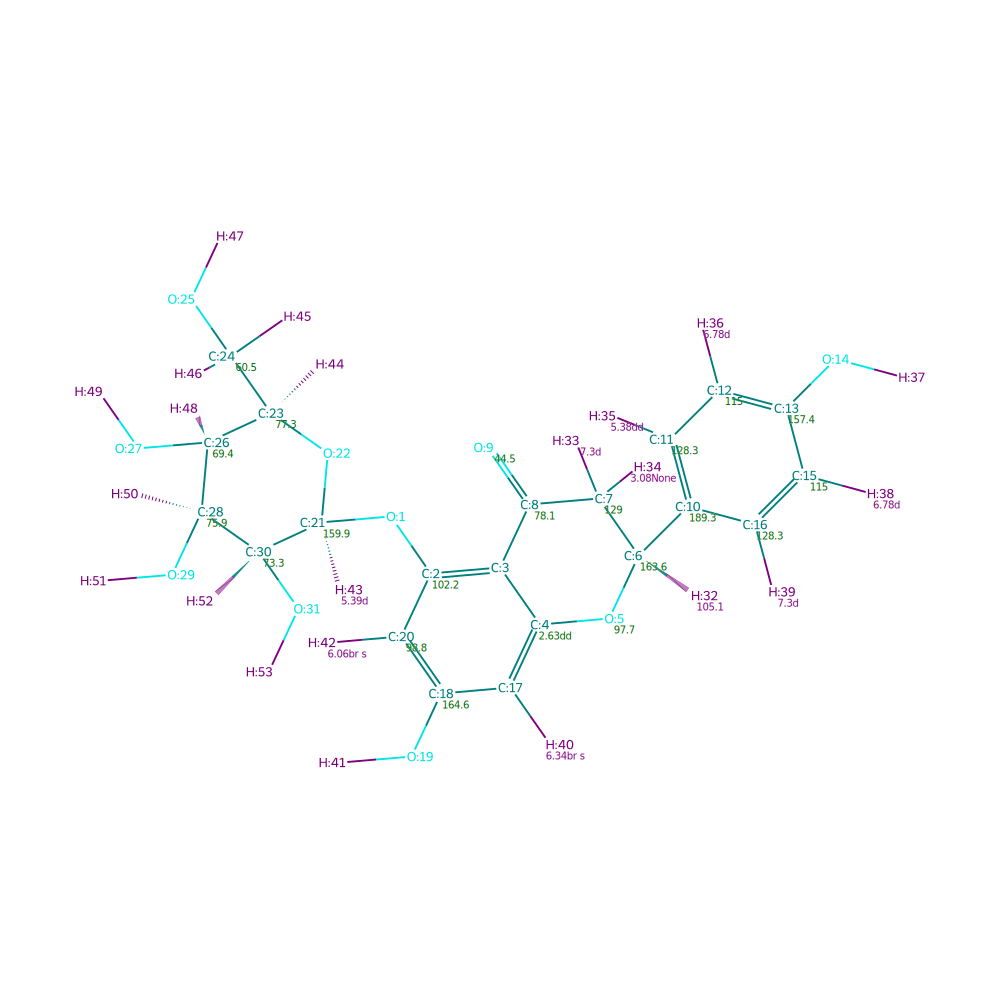

In [52]:
# Draw structure in mol2 with realigned shift values
draw_mol_with_shifts(
    mol=mol2,
    c_shifts=mol2_c_shifts,
    h_shifts=mol2_h_shifts
)